In [98]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('dark_background')

In [12]:
china_fuck = load_sample_image("china.jpg")

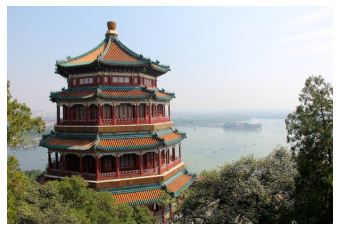

In [23]:
ax = plt.axes(xticks= [], yticks= [])
ax.imshow(china_fuck)

In [25]:
china_fuck.shape

(427, 640, 3)

## Making the scale from 0 to 1 

In [28]:
china_fuck = china_fuck / 255.0

In [34]:
converted = china_fuck.reshape(427 * 640, 3)
converted

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [35]:
converted.shape

(273280, 3)

#### Now, it is kind of data with 27k rows and 3 features...

In [149]:
# Random 10k rows (27k is a loarge)
i = np.random.permutation(converted.shape[0])[:10_000]

pixels = converted[i]

In [150]:
pixels.shape

(10000, 3)

In [170]:
R, G, B = pixels[:,0], pixels[:,1], pixels[:,2]

# 

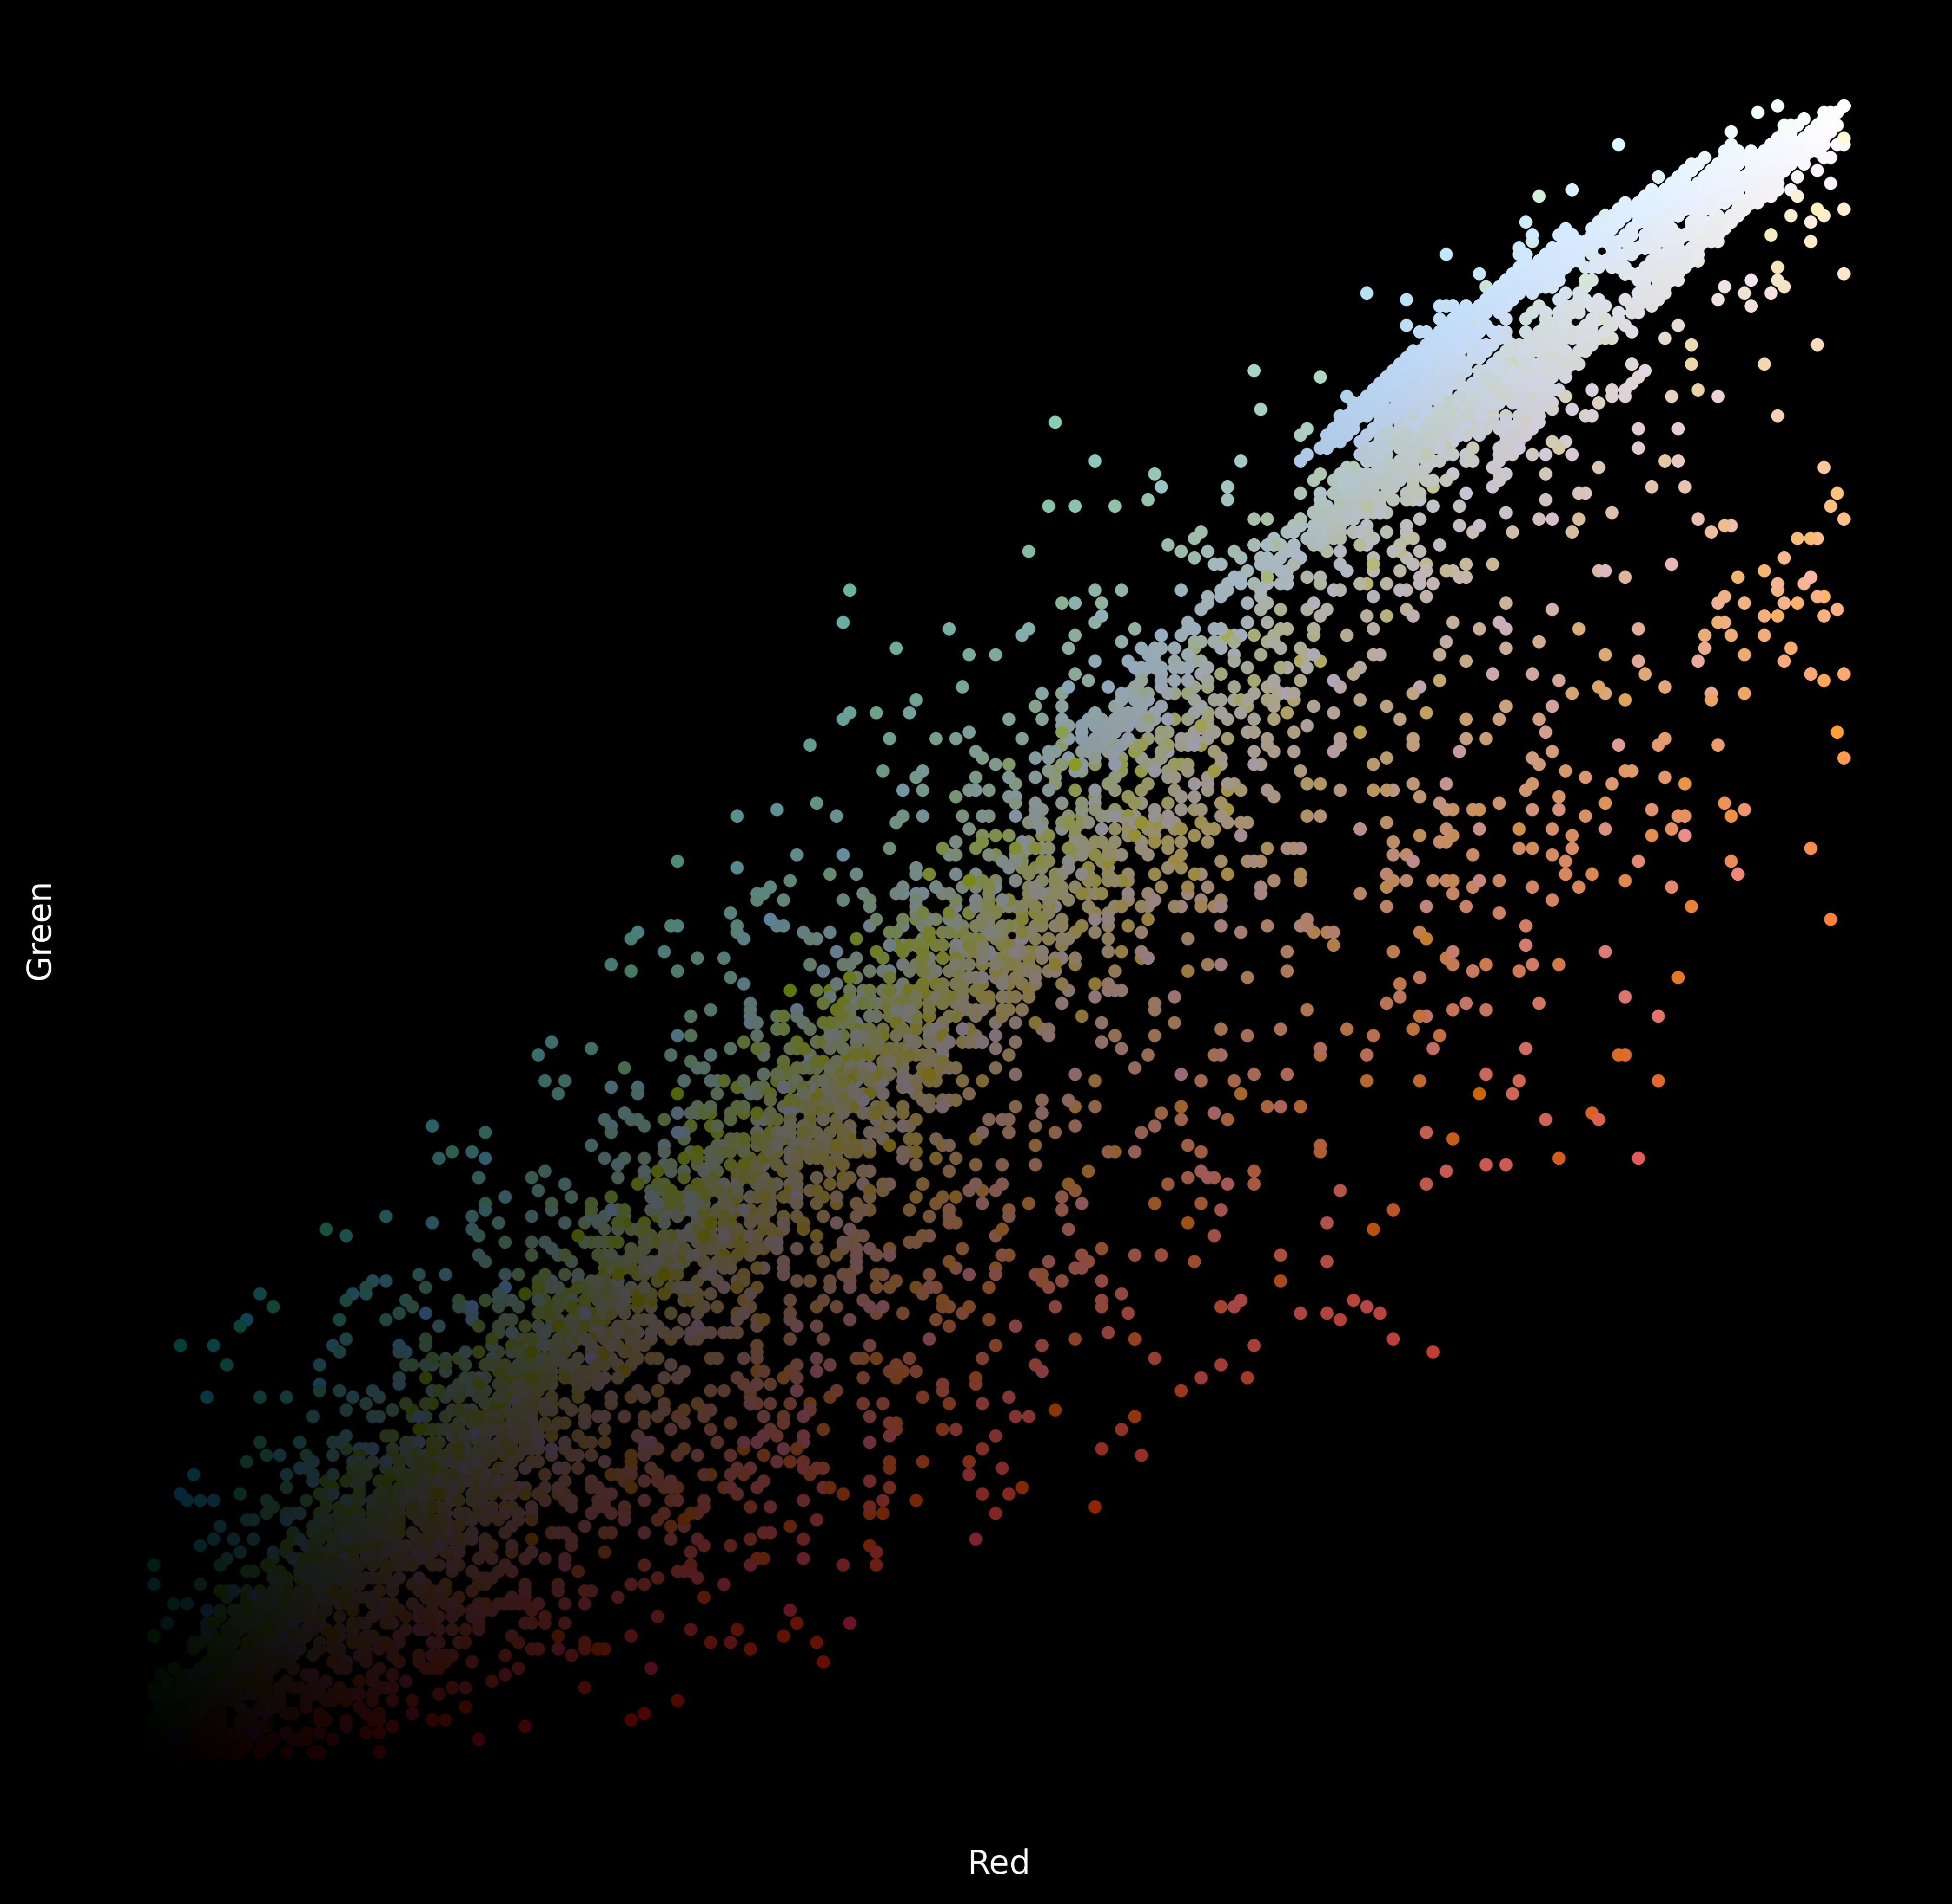

In [171]:
plt.figure(dpi= 500)
ax = plt.axes(xticks= [], yticks= [])
ax.scatter(R, G, color= pixels, marker= '.')
ax.set(xlabel= 'Red', ylabel= 'Green');

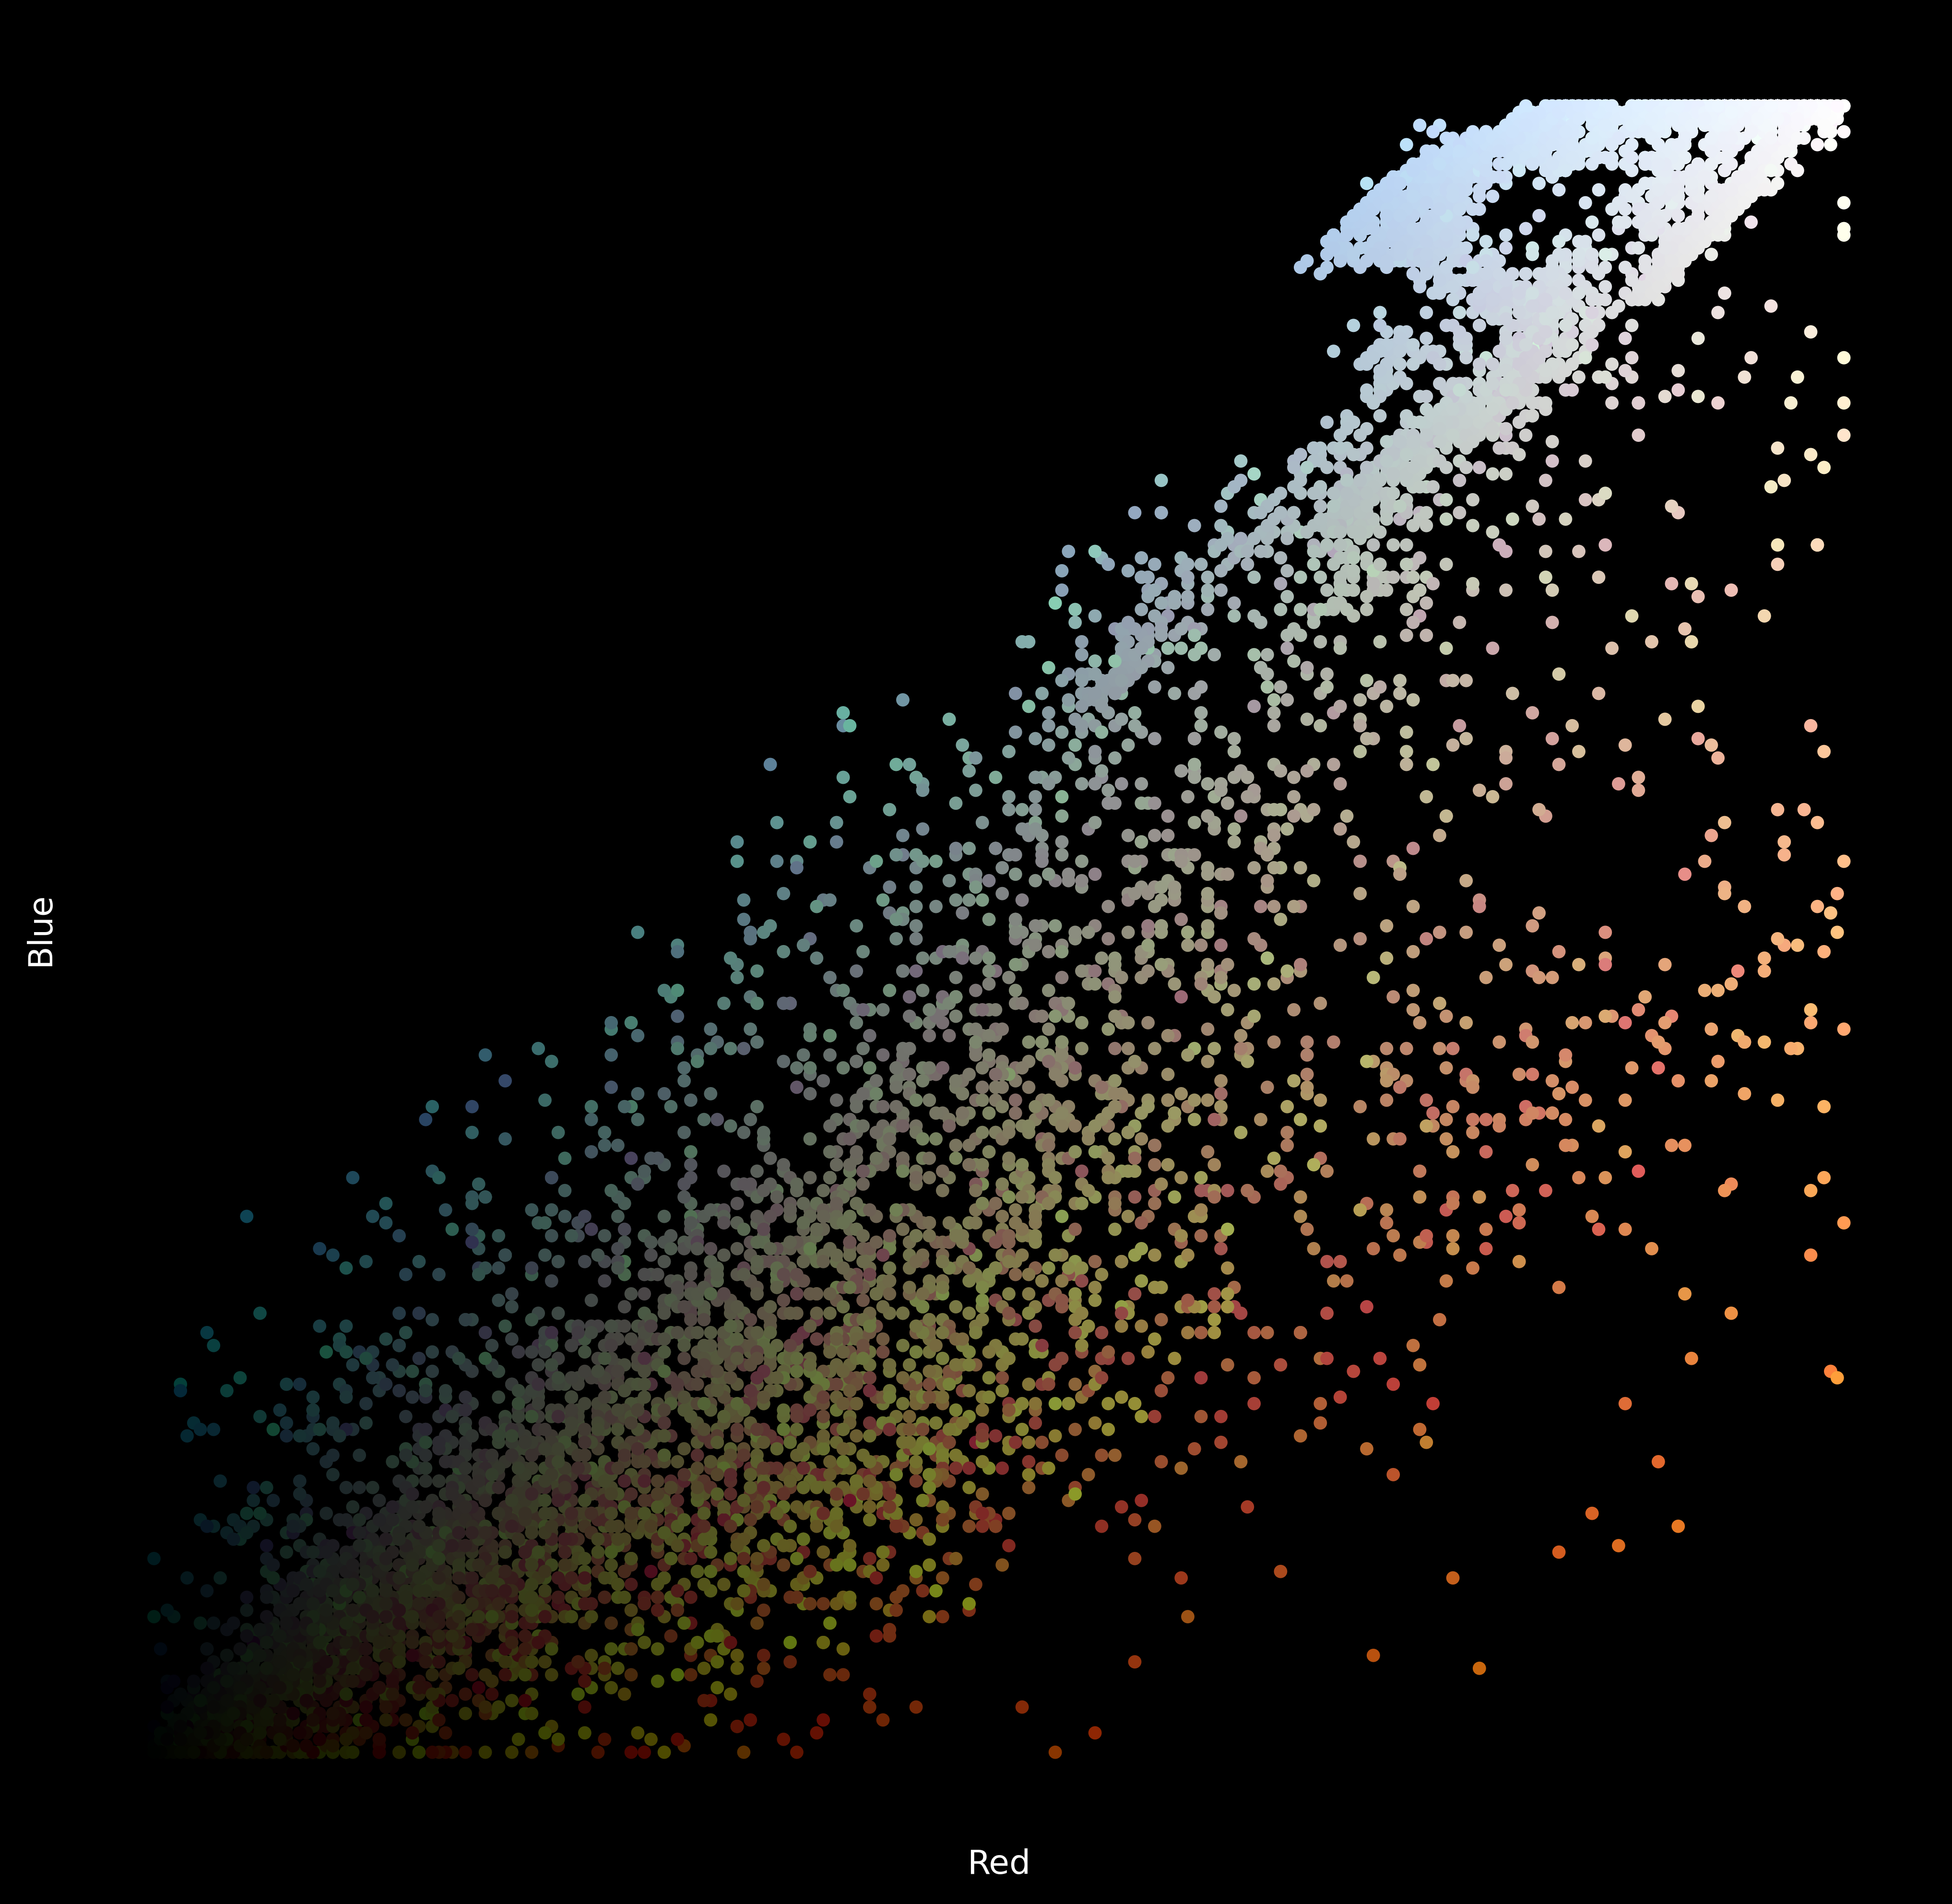

In [172]:
plt.figure(dpi= 500)
ax = plt.axes(xticks= [], yticks= [])
ax.scatter(R, B, color= pixels, marker= '.')
ax.set(xlabel= 'Red', ylabel= 'Blue');

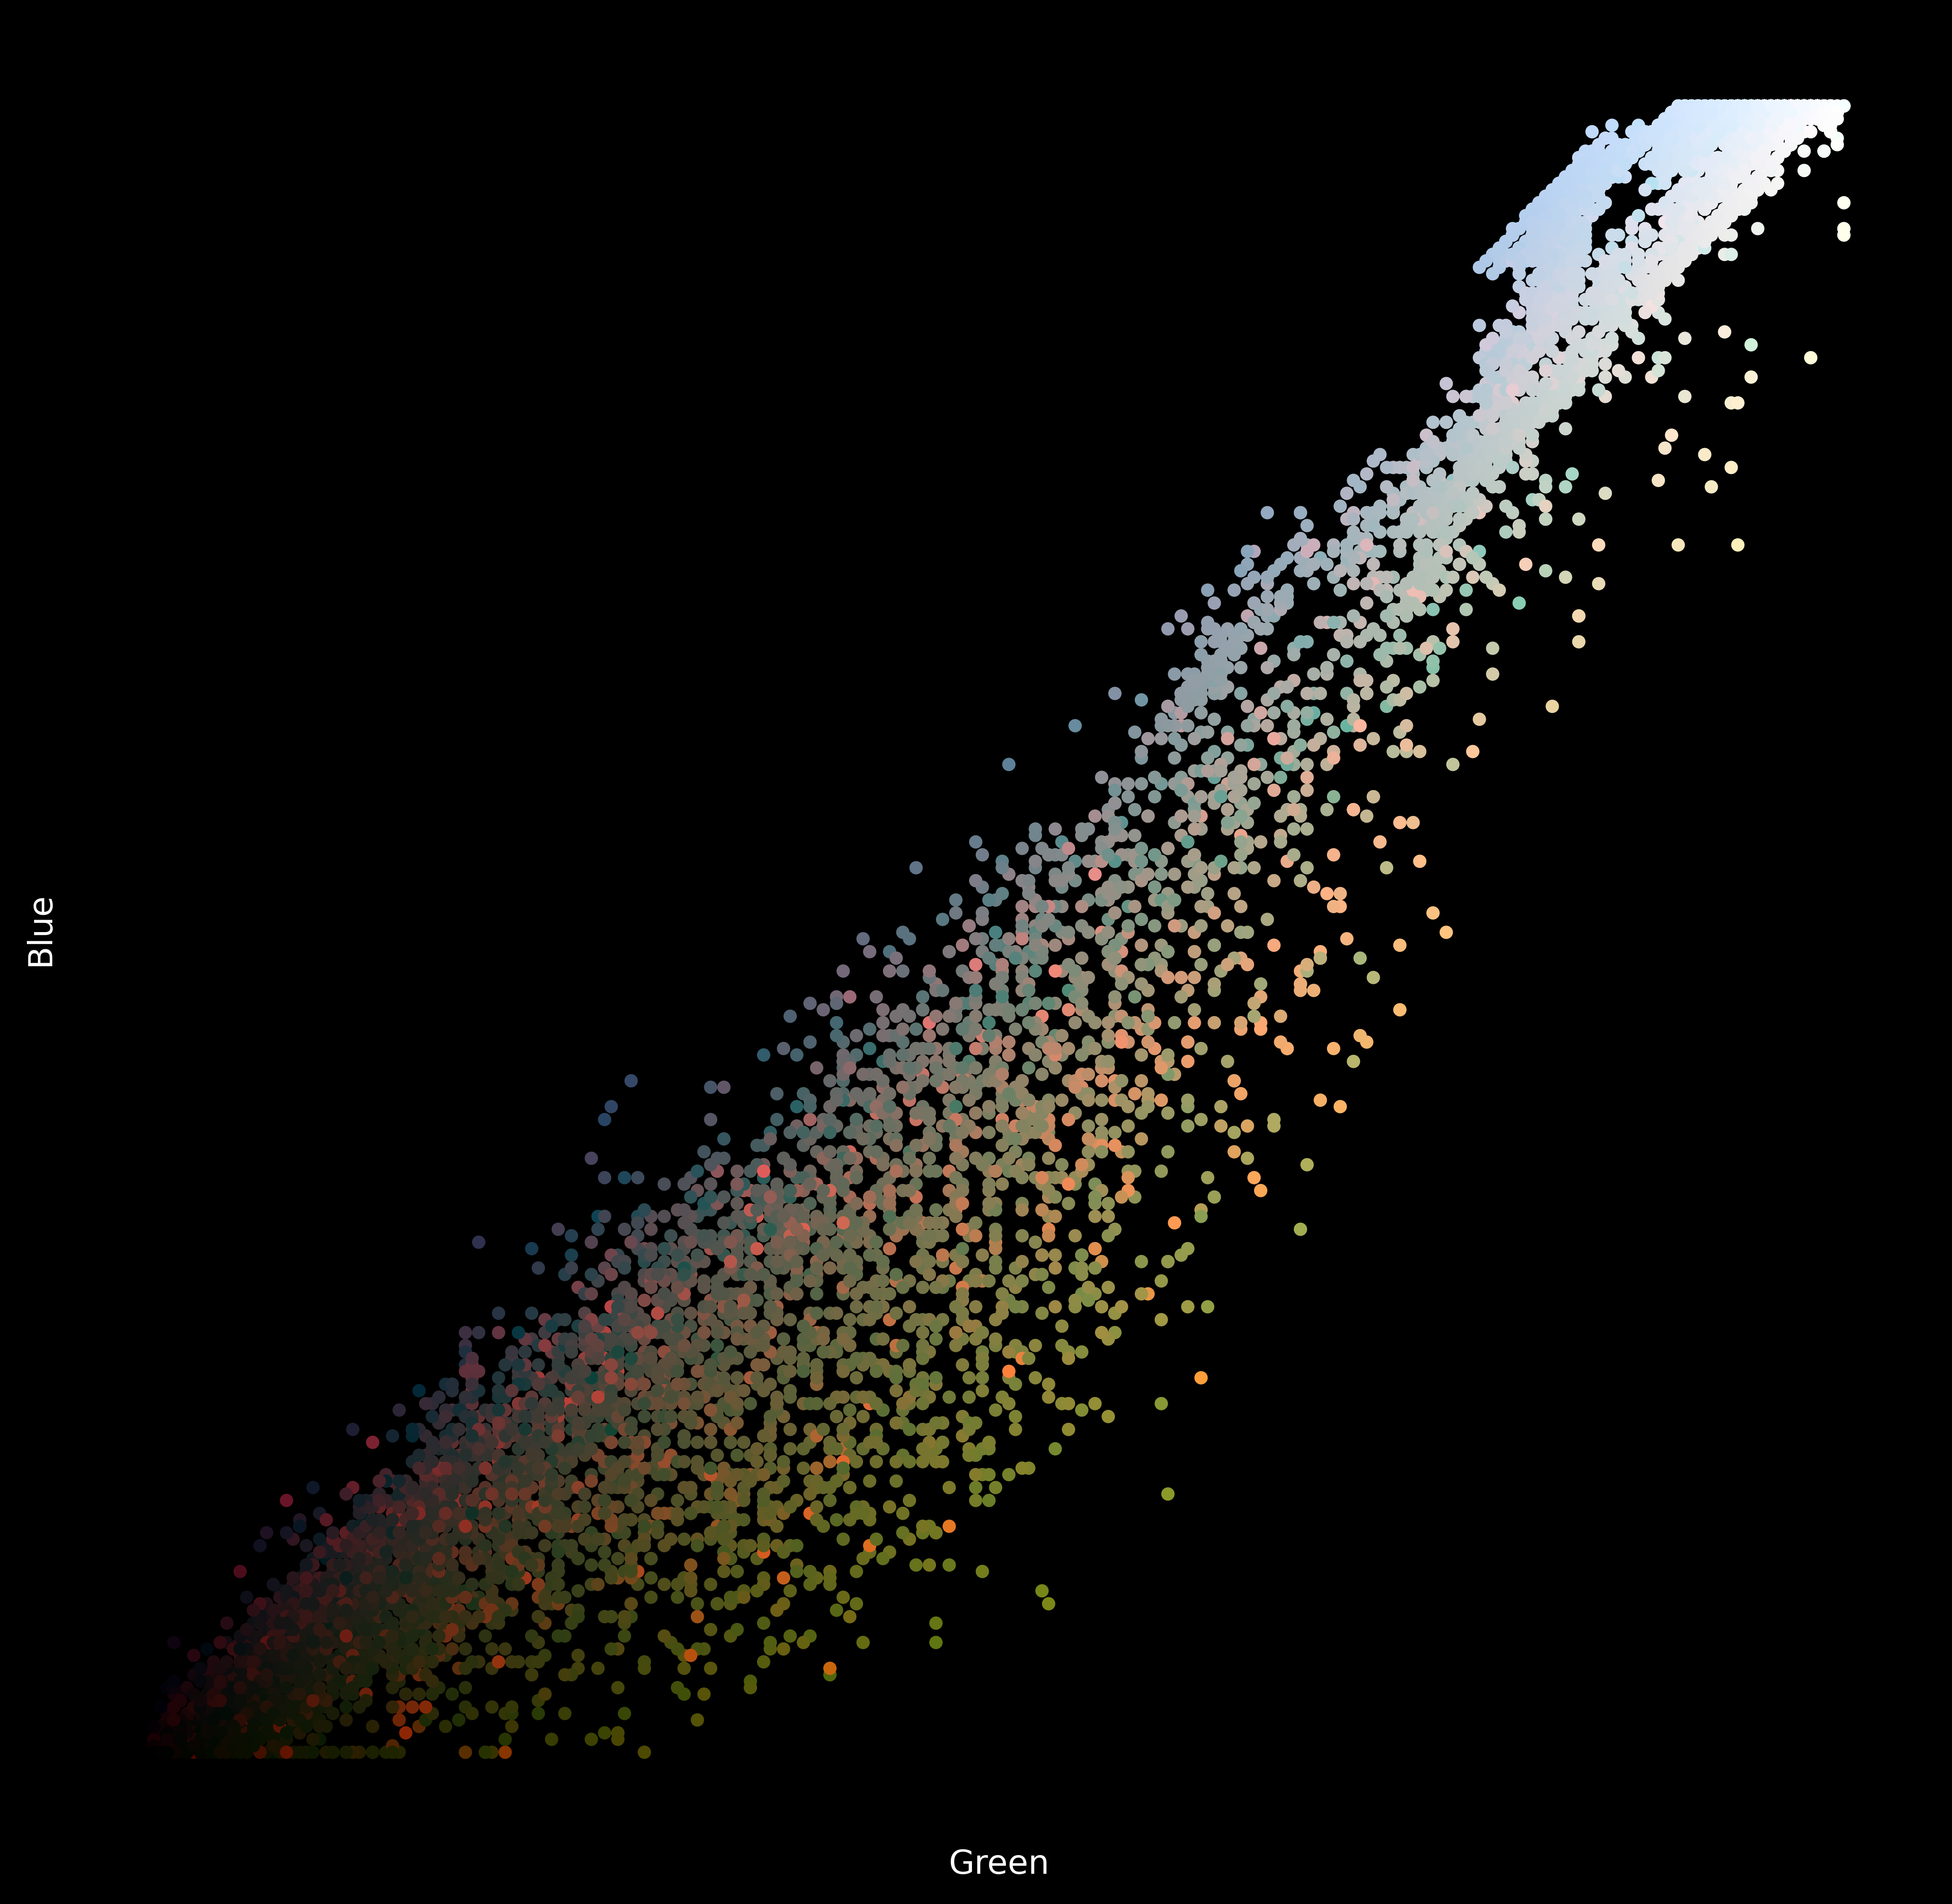

In [158]:
plt.figure(dpi= 500)
ax = plt.axes(xticks= [], yticks= [])
ax.scatter(G, B, color= pixels, marker= '.')
ax.set(xlabel= 'Green', ylabel= 'Blue');

### Pretty new right?
You might be wondering why `color= pixes` is working in the first place, as we tend to give the `c= y` prameter in the daily case which was giving different...

Here the color's work is AMAZING. It actully gives the color to all individual points... how? Simple, we already have the [[R], [G], [B]] in them !

Math...

Here are 16 Million colors!!!!!

In [73]:
255 * 255 * 255

16581375

# HERE IS THE COMPRESSION PART
We are gonna convert those - to just 16 colors! 


# 

(Hey is there any kind of cluster?? in the colors?)

In [88]:
from sklearn.cluster import MiniBatchKMeans

In [159]:
kmeans = MiniBatchKMeans(16)

In [160]:
kmeans.fit(converted)

MiniBatchKMeans(n_clusters=16)

In [161]:
kmeans.cluster_centers_.shape

(16, 3)

In [162]:
k = kmeans.cluster_centers_

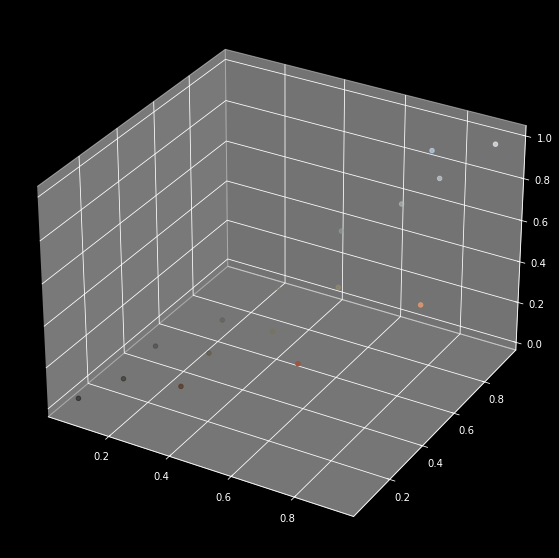

In [163]:
axe = plt.axes(projection= '3d')
axe.scatter3D(k[:,0], k[:,1], k[:,2], color= k)

Means, it has found 16 clusters in the given points...

# 

In [165]:
kmeans.predict(converted)

array([5, 5, 5, ..., 9, 3, 3])

In [166]:
new_colors = kmeans.cluster_centers_[kmeans.predict(converted)]
new_colors

array([[0.76690552, 0.85319113, 0.95007499],
       [0.76690552, 0.85319113, 0.95007499],
       [0.76690552, 0.85319113, 0.95007499],
       ...,
       [0.15821477, 0.13913782, 0.10605224],
       [0.05866489, 0.05268101, 0.03080145],
       [0.05866489, 0.05268101, 0.03080145]])

With 16 colors only...

In [195]:
# Random 10k rows (27k is a loarge)
i = np.random.permutation(new_colors.shape[0])[:10_000]

pixels = converted[i]
R, G, B = pixels[:,0], pixels[:,1], pixels[:,2]

colors = new_colors[i]

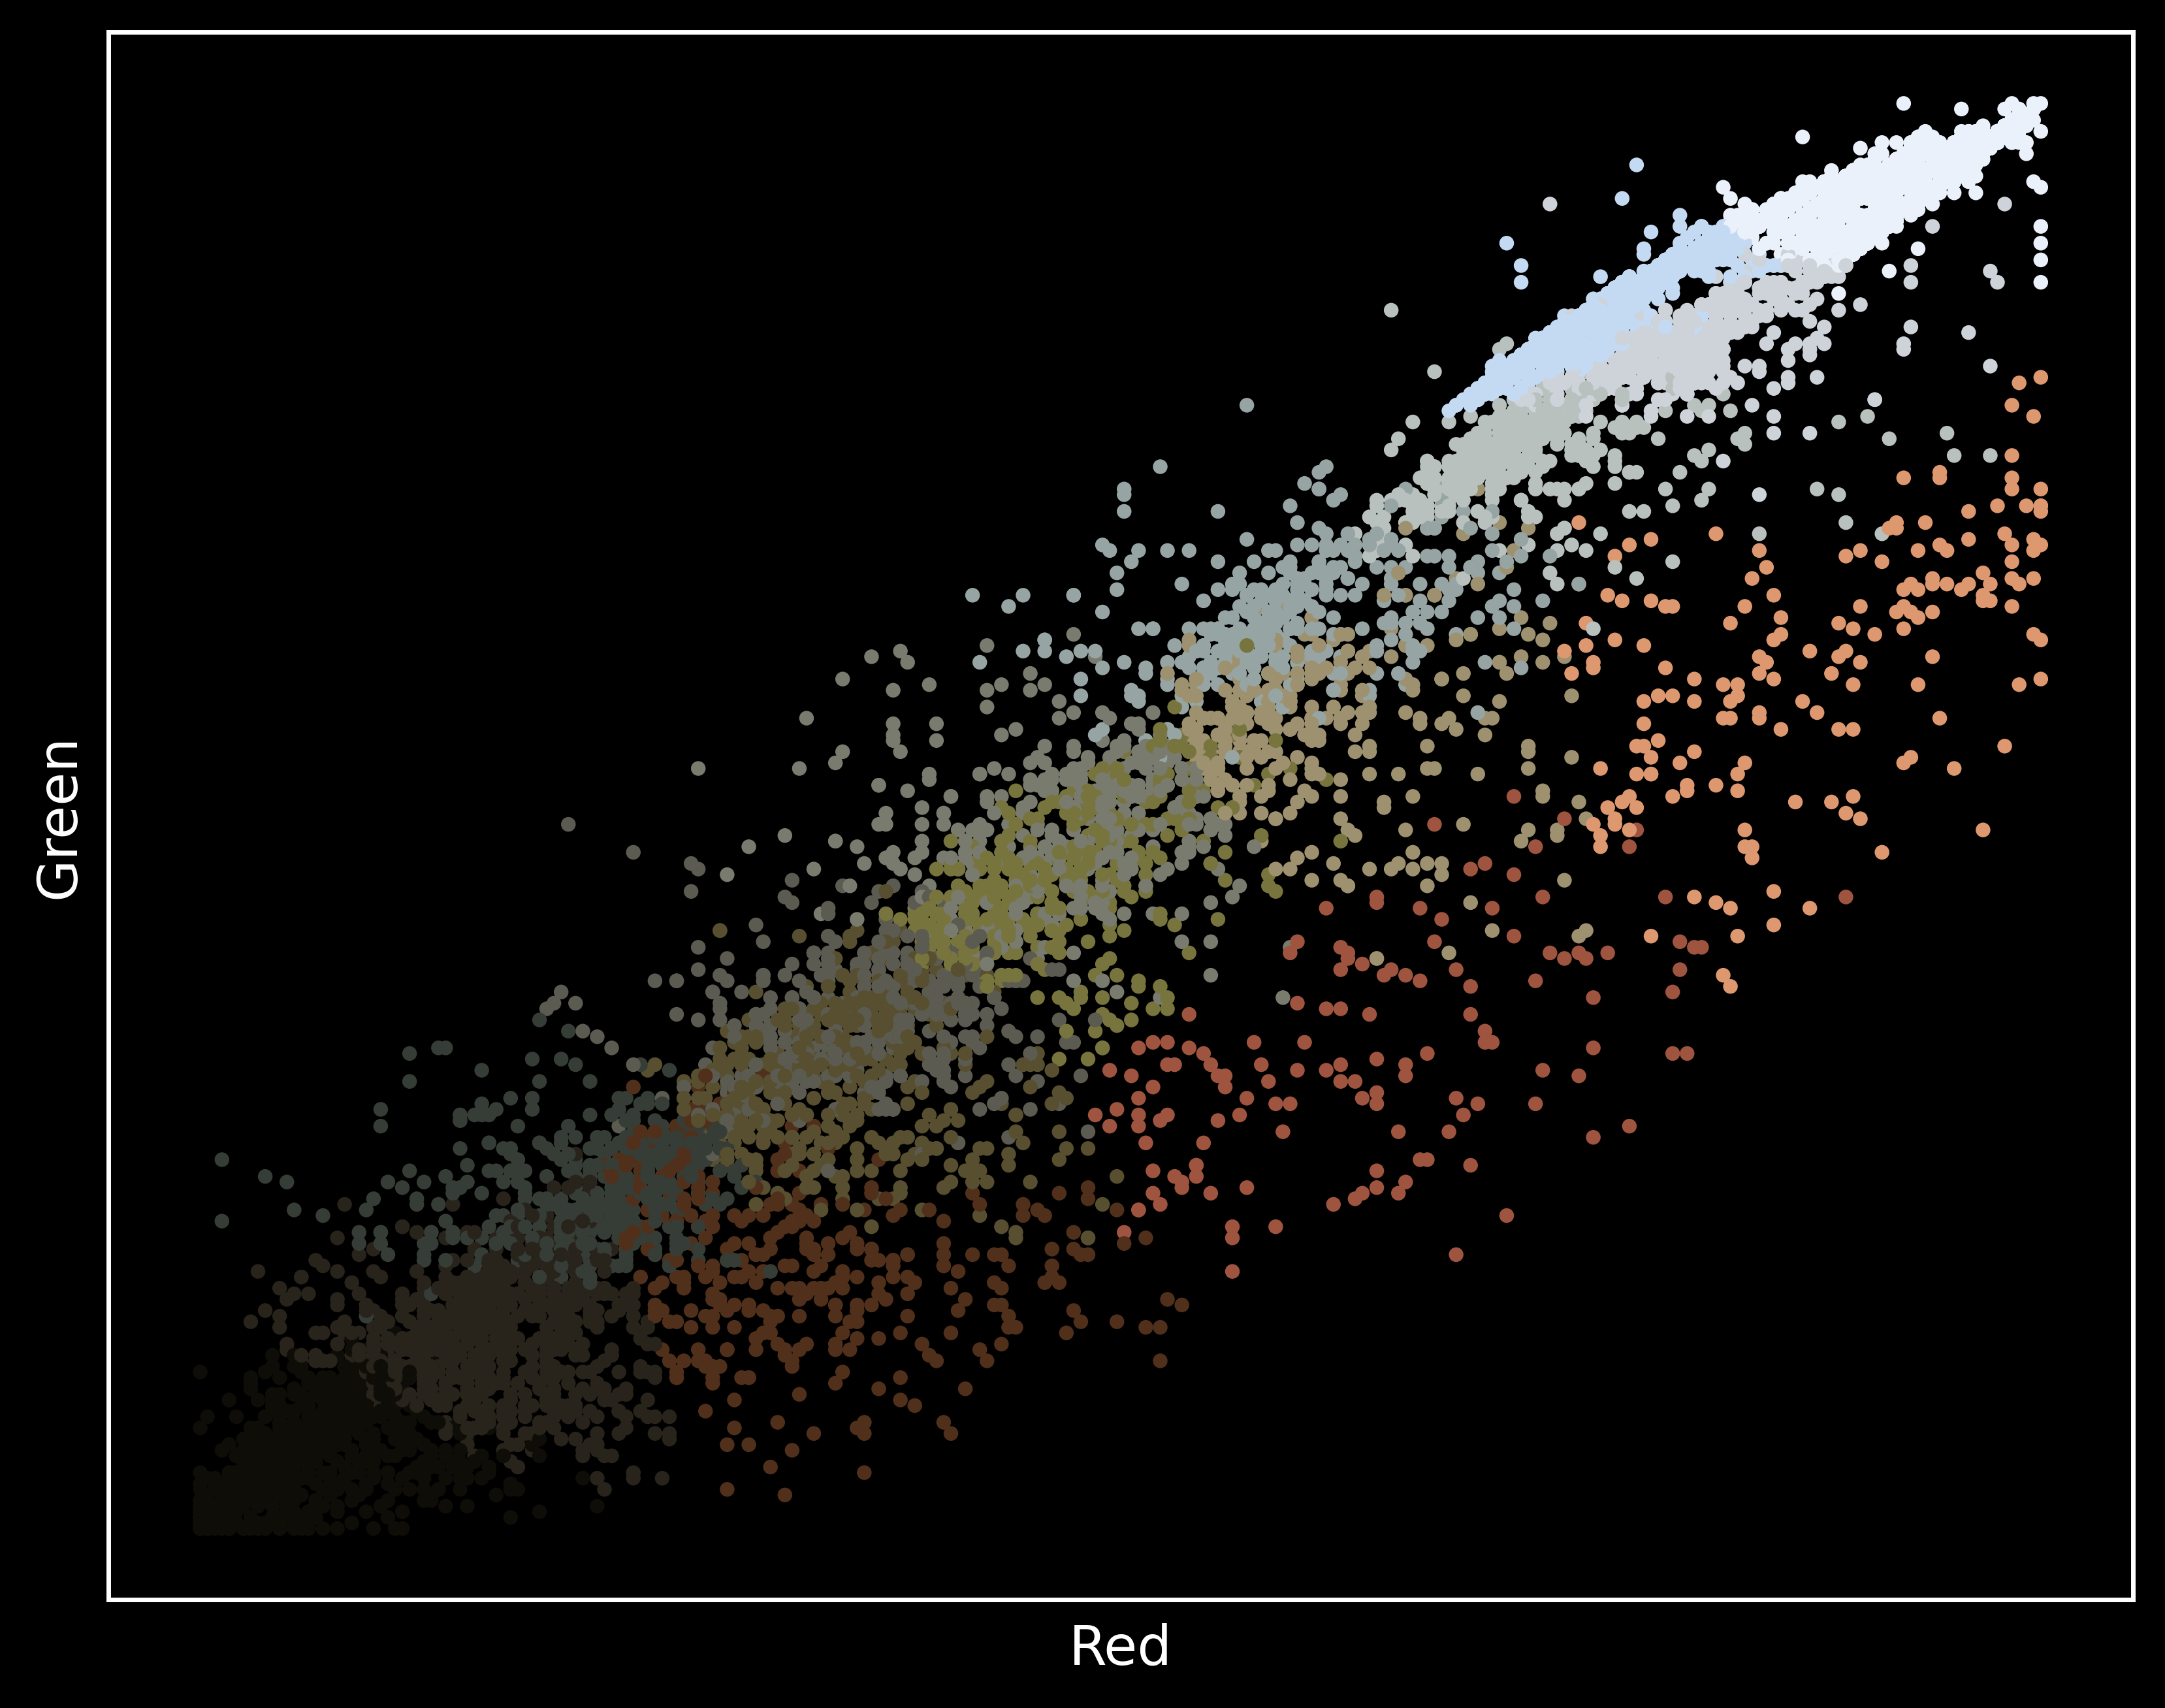

In [196]:
plt.figure(dpi= 500)
ax = plt.axes(xticks= [], yticks= [])
ax.scatter(R, G, color= colors, marker= '.')
ax.set(xlabel= 'Red', ylabel= 'Green');

# COOL! 

#### 

In [197]:
# reconstrucing
fucked_china_again = new_colors.reshape(china_fuck.shape)

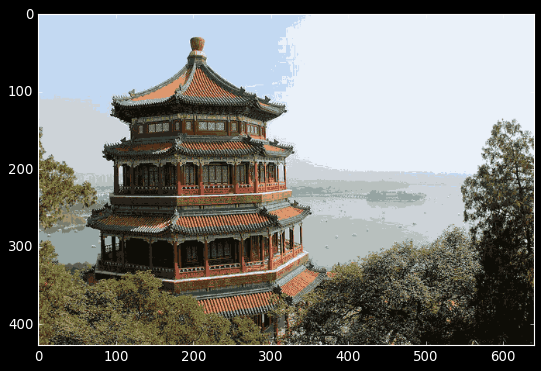

In [198]:
plt.imshow(fucked_china_again)

#### There are TOTAL 16 colors in it.